In [62]:
import numpy as np
import pandas as pd
import csv
from matplotlib import cm
import sys
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.mplot3d import Axes3D
import numpy
from numpy.random import randn
from scipy import array, newaxis
import seaborn as sns
from matplotlib.patches import Rectangle
from scipy.interpolate import InterpolatedUnivariateSpline


# d=pd.read_csv('results_all_agents_sweeps.csv')
# d.filter(like='systemicness') 

In [296]:
p='/Users/admin/git_repos/BlackRhino/examples/firesale2020/experiments/single_shock_timeseries/SYSTEM.csv'

helper={}

d=pd.read_csv(p)
d=d.drop_duplicates()
# f=d[d.time=='2015-12']
temp=[]
for t in d.time.unique():
   
    f=d[d.time==t]
    helper['time']=t
#     f['AV']=f[f.current_step>1].system_equity_losses.sum()/f[f.current_step==0].system_equity.values[0]
    helper['AV']=f[f.current_step>1].system_equity_losses.sum()/f[f.current_step==0].system_equity.values[0]
    temp.append(pd.DataFrame(helper, index=[t]))
    if t=='2020-2':
        print(f[f.current_step>1].system_equity_losses.sum())
        
        
g=pd.concat(temp)    

-39121134919.3209


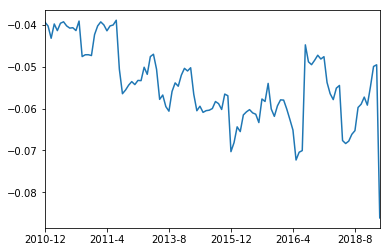

In [301]:
g.AV.plot() 

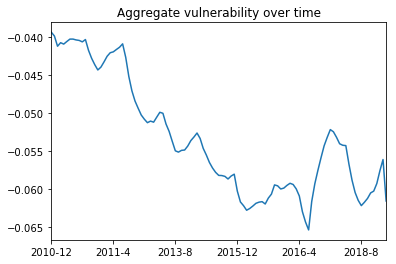

In [321]:
g.AV.ewm(span=10).mean().plot(title='Aggregate vulnerability over time') 

(-0.1, 0)

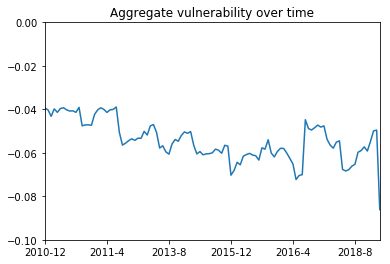

In [324]:
#moving average
g.AV.ewm(span=1).mean().plot(title='Aggregate vulnerability over time') 

plt.ylim(-0.1,0)

In [299]:
g.to_csv('av_overtime.csv')

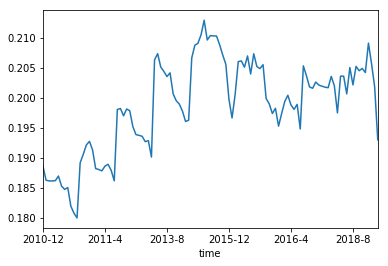

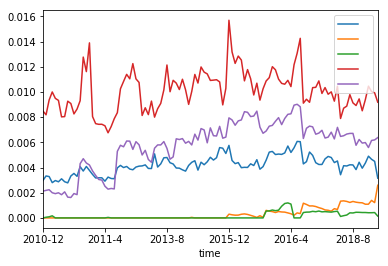

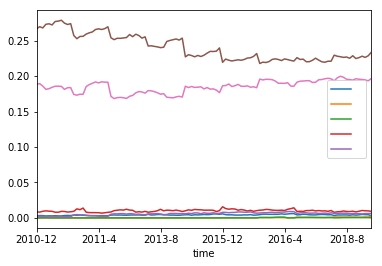

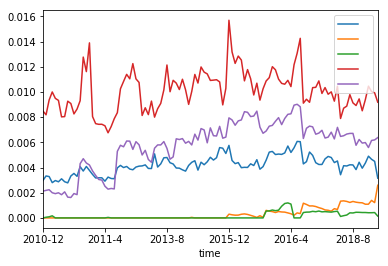

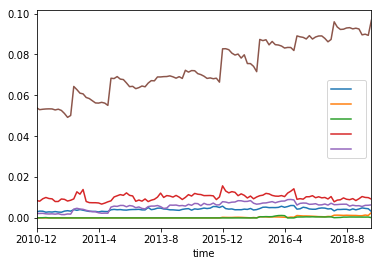

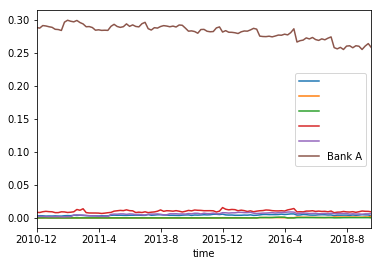

In [86]:
p='/Users/admin/git_repos/BlackRhino/examples/firesale2020/experiments/single_shock_timeseries/AGENTS.csv'

helper={}

d=pd.read_csv(p)
f=d.drop_duplicates()
f.index=f.time
# f=d[d.time=='2015-12']
g=f[f.current_step==8]
 
g=g.filter(like='systemicness')

# values=['Bank C', 'Bank I', "Bank F","Bank B","Bank D","Bank J","Bank G","Bank E","Bank H","Bank A"]

# [' FNB', ' CHARTERED', ' CAPITEC', ' ABSA', ' NEDBANK', ' AfricanB', ' CITYBANK', ' INVESTEC', ' HSBC', ' STANDARDBANK ']
g.columns = ['Bank C', ' ', " ","Bank B","Bank D"," "," ","Bank E"," ","Bank A"]
# for t in d.time.unique():
   
#     f=d[d.time==t]
#     helper['time']=t
# #     f['AV']=f[f.current_step>1].system_equity_losses.sum()/f[f.current_step==0].system_equity.values[0]
#     helper['AV']=f[f.current_step>1].system_equity_losses.sum()/f[f.current_step==0].system_equity.values[0]
#     temp.append(pd.DataFrame(helper, index=[t]))
#     if t=='2020-2':
#         print(f[f.current_step>1].system_equity_losses.sum())

for column in g[:]:
    g[column].plot(label=column)

plt.legend()
      
# g=pd.concat(temp)   

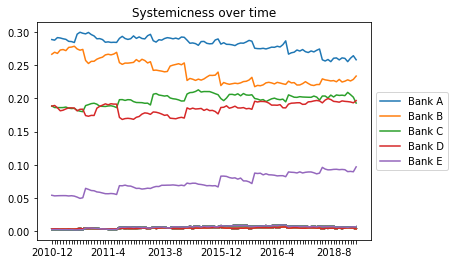

In [152]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import numpy as np
import datetime as dt



p='/Users/admin/git_repos/BlackRhino/examples/firesale2020/experiments/single_shock_timeseries/AGENTS.csv'

d=pd.read_csv(p)
f=d.drop_duplicates()
# f.index = pd.to_datetime(f['time'])
g=f[f.current_step==8]
 
g=g.filter(like='systemicness')
 
# g.index= pd.to_datetime(f[f.current_step==8].time)


# values=['Bank C', 'Bank I', "Bank F","Bank B","Bank D","Bank J","Bank G","Bank E","Bank H","Bank A"]

# [' FNB', ' CHARTERED', ' CAPITEC', ' ABSA', ' NEDBANK', ' AfricanB', ' CITYBANK', ' INVESTEC', ' HSBC', ' STANDARDBANK ']


g.columns = ['Bank C', '', " ","Bank B","Bank D"," "," ","Bank E","","Bank A"]

cols = ["Bank A" , "Bank B","Bank C","Bank D", "Bank E","", "", "", "",""]

g = g[cols] 
    
    
fig, ax = plt.subplots()
plt.title('Systemic relevance ness over time', color='black') 
r=len(g.columns)

for i in range(r):
    plt.plot( f[f.current_step==8].time.values,g[g.columns[i]])
     
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
for index, label in enumerate(ax.xaxis.get_ticklabels()):
    if index % 20 != 0:
        label.set_visible(False)
plt.show()



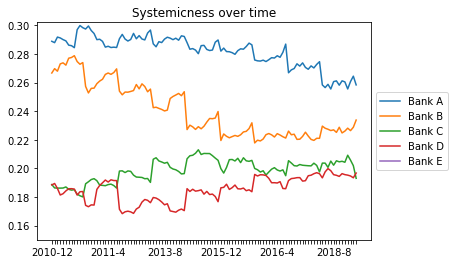

In [295]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import numpy as np
import datetime as dt



p='/Users/admin/git_repos/BlackRhino/examples/firesale2020/experiments/single_shock_timeseries/AGENTS.csv'

d=pd.read_csv(p)
f=d.drop_duplicates()
# f.index = pd.to_datetime(f['time'])
g=f[f.current_step==8]
 
g=g.filter(like='systemicness')
 
# g.index= pd.to_datetime(f[f.current_step==8].time)


# values=['Bank C', 'Bank I', "Bank F","Bank B","Bank D","Bank J","Bank G","Bank E","Bank H","Bank A"]

# [' FNB', ' CHARTERED', ' CAPITEC', ' ABSA', ' NEDBANK', ' AfricanB', ' CITYBANK', ' INVESTEC', ' HSBC', ' STANDARDBANK ']


g.columns = ['Bank C', '', " ","Bank B","Bank D"," "," ","Bank E","","Bank A"]

cols = ["Bank A" , "Bank B","Bank C","Bank D", "Bank E","", "", "", "",""]

g = g[cols] 
    
    
fig, ax = plt.subplots()
plt.title('Systemicness over time', color='black') 
r=len(g.columns)

for i in range(r):
    plt.plot( f[f.current_step==8].time.values,g[g.columns[i]])
    plt.ylim(0.15)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
for index, label in enumerate(ax.xaxis.get_ticklabels()):
    if index % 20 != 0:
        label.set_visible(False)
plt.show()


In [141]:
 f[f.current_step==8].time.values[::15]

array(['2010-12', '2011-9', '2012-6', '2013-3', '2015-12', '2016-9',
       '2017-6', '2018-3'], dtype=object)

In [155]:
g.index=f[f.current_step==8].time.values
g.to_csv('isthissystemicness.csv')

In [126]:

g.to_csv('abcdefgr.csv')

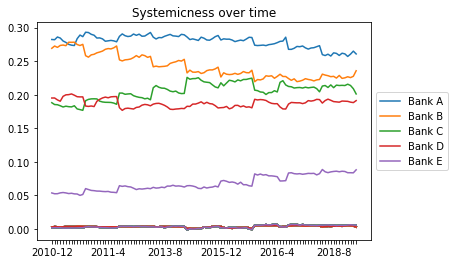

In [158]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import numpy as np
import datetime as dt



p='/Users/admin/git_repos/BlackRhino/examples/firesale2020/experiments/single_shock_timeseries/AGENTS.csv'

d=pd.read_csv(p)
f=d.drop_duplicates()
# f.index = pd.to_datetime(f['time'])
g=f[f.current_step==2]
 
g=g.filter(like='systemicness')
 
# g.index= pd.to_datetime(f[f.current_step==8].time)


# values=['Bank C', 'Bank I', "Bank F","Bank B","Bank D","Bank J","Bank G","Bank E","Bank H","Bank A"]

# [' FNB', ' CHARTERED', ' CAPITEC', ' ABSA', ' NEDBANK', ' AfricanB', ' CITYBANK', ' INVESTEC', ' HSBC', ' STANDARDBANK ']


g.columns = ['Bank C', '', " ","Bank B","Bank D"," "," ","Bank E","","Bank A"]

cols = ["Bank A" , "Bank B","Bank C","Bank D", "Bank E","", "", "", "",""]

g = g[cols] 
    
    
fig, ax = plt.subplots()
plt.title('Systemicness over time', color='black') 
r=len(g.columns)

for i in range(r):
    plt.plot( f[f.current_step==2].time.values,g[g.columns[i]])
     
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
for index, label in enumerate(ax.xaxis.get_ticklabels()):
    if index % 20 != 0:
        label.set_visible(False)
plt.show()


In [160]:
g.index=f[f.current_step==2].time.values

g.to_csv('abc.csv')

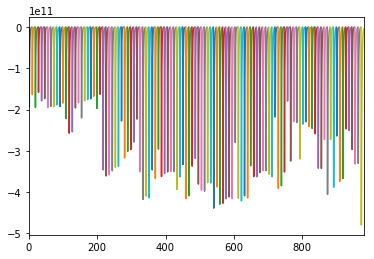

In [51]:

t=['2015-2', '2018-2', '2020-2']
for t in d.time.unique():
    f=d[d.time==t]
    f.system_TAS.plot()



In [172]:

p='/Users/admin/git_repos/BlackRhino/examples/firesale2020/experiments/single_shock_timeseries/AGENTS.csv'

d=pd.read_csv(p)
f=d.drop_duplicates()
# f.index = pd.to_datetime(f['time'])
g=f

test=g.filter(regex='direct_impact|equity_losses_from_system_deleveraging').columns

g = g[test]
g['time'] =  f.time
g.index=f.time

for t in f.time.unique():
    if t=='2020-2':
        x=g[g.time==t]
x 
# g.index= pd.to_datetime(f[f.current_step==8].time)


# values=['Bank C', 'Bank I', "Bank F","Bank B","Bank D","Bank J","Bank G","Bank E","Bank H","Bank A"]

# [' FNB', ' CHARTERED', ' CAPITEC', ' ABSA', ' NEDBANK', ' AfricanB', ' CITYBANK', ' INVESTEC', ' HSBC', ' STANDARDBANK ']


# g.columns = ['Bank C', '', " ","Bank B","Bank D"," "," ","Bank E","","Bank A"]

# cols = ["Bank A" , "Bank B","Bank C","Bank D", "Bank E","", "", "", "",""]

# g = g[cols] 

/Users/admin/opt/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,equity_losses_from_system_deleveraging FNB,direct_impact FNB,equity_losses_from_system_deleveraging CHARTERED,direct_impact CHARTERED,equity_losses_from_system_deleveraging CAPITEC,direct_impact CAPITEC,equity_losses_from_system_deleveraging ABSA,direct_impact ABSA,equity_losses_from_system_deleveraging NEDBANK,direct_impact NEDBANK,...,direct_impact AfricanB,equity_losses_from_system_deleveraging CITYBANK,direct_impact CITYBANK,equity_losses_from_system_deleveraging INVESTEC,direct_impact INVESTEC,equity_losses_from_system_deleveraging HSBC,direct_impact HSBC,equity_losses_from_system_deleveraging STANDARDBANK,direct_impact STANDARDBANK,time
time,,,,,,,,,,,,,,,,,,,,,
2020-2,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2020-2
2020-2,0.000000e+00,-1.665380e+10,0.000000e+00,0.000000e+00,0.000000e+00,-1.786084e+10,0.000000e+00,-7.687954e+09,0.000000e+00,-7.035780e+09,...,-7.748158e+09,0.000000e+00,0.000000e+00,0.000000e+00,-6.297161e+08,0.000000e+00,0.000000e+00,0.000000e+00,-1.160045e+10,2020-2
2020-2,-3.835407e+09,-3.835407e+09,-4.941902e+07,-4.941902e+07,-1.410093e+08,-1.410093e+08,-4.495122e+09,-4.495122e+09,-3.646108e+09,-3.646108e+09,...,-1.320992e+07,-1.374674e+08,-1.374674e+08,-1.678114e+09,-1.678114e+09,-1.049271e+08,-1.049271e+08,-4.973079e+09,-4.973079e+09,2020-2
2020-2,-1.914177e+09,-1.914177e+09,-2.827941e+07,-2.827941e+07,-2.502398e+07,-2.502398e+07,-2.330022e+09,-2.330022e+09,-1.955908e+09,-1.955908e+09,...,-1.529532e+06,-8.433683e+07,-8.433683e+07,-9.497666e+08,-9.497666e+08,-5.778245e+07,-5.778245e+07,-2.568675e+09,-2.568675e+09,2020-2
2020-2,-9.911574e+08,-9.911574e+08,-1.554751e+07,-1.554751e+07,-1.298872e+07,-1.298872e+07,-1.204953e+09,-1.204953e+09,-1.014873e+09,-1.014873e+09,...,-7.396036e+05,-4.579717e+07,-4.579717e+07,-4.971191e+08,-4.971191e+08,-3.167014e+07,-3.167014e+07,-1.330398e+09,-1.330398e+09,2020-2
2020-2,-5.076611e+08,-5.076611e+08,-8.195157e+06,-8.195157e+06,-6.742235e+06,-6.742235e+06,-6.160177e+08,-6.160177e+08,-5.185997e+08,-5.185997e+08,...,-3.769411e+05,-2.394840e+07,-2.394840e+07,-2.546496e+08,-2.546496e+08,-1.662671e+07,-1.662671e+07,-6.805657e+08,-6.805657e+08,2020-2
2020-2,-2.578545e+08,-2.578545e+08,-4.195608e+06,-4.195608e+06,-3.447322e+06,-3.447322e+06,-3.125455e+08,-3.125455e+08,-2.630457e+08,-2.630457e+08,...,-1.925694e+05,-1.222848e+07,-1.222848e+07,-1.292897e+08,-1.292897e+08,-8.489936e+06,-8.489936e+06,-3.453805e+08,-3.453805e+08,2020-2
2020-2,-1.303868e+08,-1.303868e+08,-2.129586e+06,-2.129586e+06,-1.748995e+06,-1.748995e+06,-1.579512e+08,-1.579512e+08,-1.329166e+08,-1.329166e+08,...,-9.769609e+04,-6.198937e+06,-6.198937e+06,-6.536113e+07,-6.536113e+07,-4.303260e+06,-4.303260e+06,-1.745658e+08,-1.745658e+08,2020-2
2020-2,-6.578118e+07,-6.578118e+07,-1.076443e+06,-1.076443e+06,-8.838726e+05,-8.838726e+05,-7.966444e+07,-7.966444e+07,-6.703312e+07,-6.703312e+07,...,-4.937159e+04,-3.131356e+06,-3.131356e+06,-3.297120e+07,-3.297120e+07,-2.173624e+06,-2.173624e+06,-8.804949e+07,-8.804949e+07,2020-2


In [199]:

p='/Users/admin/git_repos/BlackRhino/examples/firesale2020/experiments/single_shock_timeseries/AGENTS.csv'

d=pd.read_csv(p)
f=d.drop_duplicates()
# f.index = pd.to_datetime(f['time'])
g=f

test=g.filter(regex='direct_impact|current_step.1').columns

g = g[test]
g['time'] =  f.time
g.index=f.time

for t in f.time.unique():
    if t=='2020-2':
        x=g[g.time==t]
        

      
 
for column in x:
    newstring = column.replace("direct_impact", "")
    x = x.rename(columns={column: newstring})
 
z=pd.melt(x, id_vars=[ 'current_step.1'] )
z=z[z.variable!='time']
z



/Users/admin/opt/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,current_step.1,variable,value
0,0,FNB,0
1,1,FNB,-1.66538e+10
2,2,FNB,-3.83541e+09
3,3,FNB,-1.91418e+09
4,4,FNB,-9.91157e+08
5,5,FNB,-5.07661e+08
6,6,FNB,-2.57855e+08
7,7,FNB,-1.30387e+08
8,8,FNB,-6.57812e+07
9,0,CHARTERED,0


In [292]:
results = []

p='/Users/admin/git_repos/BlackRhino/examples/firesale2020/experiments/single_shock_timeseries/AGENTS.csv'

d=pd.read_csv(p)
f=d.drop_duplicates()


times=f.time.unique()

for tim in times:



    p='/Users/admin/git_repos/BlackRhino/examples/firesale2020/experiments/single_shock_timeseries/AGENTS.csv'

    d=pd.read_csv(p)
    f=d.drop_duplicates()
    # f.index = pd.to_datetime(f['time'])
    g=f

    test=g.filter(regex='equity_losses_from_system_deleveraging|current_step.1').columns

    g = g[test]
    g['time'] =  f.time
    g.index=f.time

    for t in f.time.unique():
        if t==tim:
            x=g[g.time==t]



    for column in x:
        newstring = column.replace("equity_losses_from_system_deleveraging", "")
        x = x.rename(columns={column: newstring})

    z=pd.melt(x, id_vars=[ 'current_step.1'] )
    z=z[z.variable!='time']
    z.groupby('variable').value.sum()

    indirect_losses =z

    p='/Users/admin/git_repos/BlackRhino/examples/firesale2020/experiments/single_shock_timeseries/AGENTS.csv'

    d=pd.read_csv(p)
    f=d.drop_duplicates()
    # f.index = pd.to_datetime(f['time'])
    g=f


    test=g.filter(regex='equity|current_step.1').columns
    not_ = g.filter(regex='equity_losses').columns
    g = g[test]

    g = g.drop(not_, axis=1)

    g['time'] =  f.time
    g.index=f.time

    g=g[g['current_step.1']==0]

    for t in f.time.unique():
        if t==tim:
            x=g[g.time==t]


    for column in x:
        newstring = column.replace("equity", "")
        x = x.rename(columns={column: newstring})

    z=pd.melt(x, id_vars=[ 'current_step.1'] )
    z=z[z.variable!='time']
    z.groupby('variable').value.sum()

    equity =z

    equity=equity.sort_values(by='variable')
    equity.columns= ['current_step', 'bank', 'pre_shock_equity']
    equity

    IV=indirect_losses.groupby('variable')['value'].sum().reset_index().sort_values(by='variable')
    IV.columns= [ 'bank', 'indirect_spillover']
    IV=pd.merge(equity, IV, on='bank') 
    IV['IV']=(IV['indirect_spillover']/IV['pre_shock_equity'] )*100

    IV['time']=tim

    IV  = IV.drop('current_step', axis=1)

    old=IV.bank.values.tolist()
    new=['Bank B', 'Bank J', "Bank F","Bank I","Bank G","Bank C","Bank H","Bank E", "Bank D","Bank A"]
    new_dict = dict(zip(old, new))


    # STANDARDBANK 	A
    # ABSA	B
    # FNB	C
    # NEDBANK	D
    # INVESTEC	E
    # CAPITEC	F
    # CITYBANK	G
    # HSBC	H
    # CHARTERED	I
    # AfricanB	J
    # JPM - K 
    # chinaConstr - L 

    # print(len(values))

    IV['bank']=IV.bank.map(new_dict)
    results.append(IV)
    print('{} done'.format(tim))



/Users/admin/opt/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2010-12 done
2010-11 done
2010-10 done
2010-9 done
2010-8 done
2010-7 done
2010-6 done
2010-5 done
2010-4 done
2010-3 done
2010-2 done
2010-1 done
2011-12 done
2011-11 done
2011-10 done
2011-9 done
2011-8 done
2011-7 done
2011-6 done
2011-5 done
2011-4 done
2011-3 done
2011-2 done
2011-1 done
2012-12 done
2012-11 done
2012-10 done
2012-9 done
2012-8 done
2012-7 done
2012-6 done
2012-5 done
2012-4 done
2012-3 done
2012-2 done
2012-1 done
2013-12 done
2013-11 done
2013-10 done
2013-9 done
2013-8 done
2013-7 done
2013-6 done
2013-5 done
2013-4 done
2013-3 done
2013-2 done
2013-1 done
2014-12 done
2014-11 done
2014-10 done
2014-9 done
2014-8 done
2014-7 done
2014-6 done
2014-5 done
2014-4 done
2014-3 done
2014-2 done
2014-1 done
2015-12 done
2015-11 done
2015-10 done
2015-9 done
2015-8 done
2015-7 done
2015-6 done
2015-5 done
2015-4 done
2015-3 done
2015-2 done
2015-1 done
2016-12 done
2016-11 done
2016-10 done
2016-9 done
2016-8 done
2016-7 done
2016-6 done
2016-5 done
2016-4 done
2016-3 

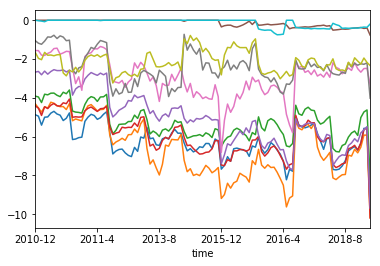

In [293]:
df=pd.concat(results)

df.index=df.time

df.groupby('bank')['IV'].plot()



df.to_csv('IV_timeseries_anonymous.csv')

In [269]:
tim='2020-2'
p='/Users/admin/git_repos/BlackRhino/examples/firesale2020/experiments/single_shock_timeseries/AGENTS.csv'

d=pd.read_csv(p)
f=d.drop_duplicates()
# f.index = pd.to_datetime(f['time'])
g=f

test=g.filter(regex='direct_impact|current_step.1').columns

g = g[test]
g['time'] =  f.time
g.index=f.time

g=g[g['current_step.1']==1] #VERY IMPORTANT

for t in f.time.unique():
    if t==tim:
        x=g[g.time==t]
        

o=x   
for column in x:
    newstring = column.replace("direct_impact", "")
    x = x.rename(columns={column: newstring})
 
z=pd.melt(x, id_vars=[ 'current_step.1'] )
z=z[z.variable!='time']
z.groupby('variable').value.sum()

direct_losses =z

direct_losses.sort_values(by='variable')
# direct_losses.columns
direct_losses = direct_losses.drop('current_step.1', axis=1)
direct_losses.columns= [ 'bank', 'direct_impact']
direct_losses

Vul=pd.merge(IV,direct_losses, on='bank')
Vul['DV']=(Vul['direct_impact']/Vul['pre_shock_equity'])*100

Vul 

/Users/admin/opt/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,bank,direct_impact
0,FNB,-1.66538e+10
1,CHARTERED,0
2,CAPITEC,-1.78608e+10
3,ABSA,-7.68795e+09
4,NEDBANK,-7.03578e+09
5,AfricanB,-7.74816e+09
6,CITYBANK,0
7,INVESTEC,-6.29716e+08
8,HSBC,0
9,STANDARDBANK,-1.16004e+10


In [290]:
#Make anonymous

old=IV.bank.values.tolist()
new=['Bank B', 'Bank J', "Bank F","Bank I","Bank G","Bank C","Bank H","Bank E", "Bank D","Bank A"]
new_dict = dict(zip(old, new))


# STANDARDBANK 	A
# ABSA	B
# FNB	C
# NEDBANK	D
# INVESTEC	E
# CAPITEC	F
# CITYBANK	G
# HSBC	H
# CHARTERED	I
# AfricanB	J
# JPM - K 
# chinaConstr - L 

# print(len(values))

IV['bank']=IV.bank.map(new_dict)

# temp50['bank'] = temp50['bank'].map(new_dict)
# temp10['bank'] = temp10['bank'].map(new_dict)


In [291]:
IV.to_csv()

,bank,pre_shock_equity,indirect_spillover,IV,time
0,Bank B,9.02263e+10,-9.196275e+09,-10.1925,2020-2
1,Bank J,8.36909e+09,-1.619563e+07,-0.193517,2020-2
2,Bank F,2.49927e+10,-1.918444e+08,-0.767601,2020-2
3,Bank I,4.65869e+09,-1.088427e+08,-2.33634,2020-2
4,Bank G,9.39288e+09,-3.131085e+08,-3.33347,2020-2
5,Bank C,9.42124e+10,-7.702425e+09,-8.17559,2020-2
6,Bank H,5.62314e+09,-2.259732e+08,-4.01863,2020-2
7,Bank E,3.72499e+10,-3.607272e+09,-9.68396,2020-2
8,Bank D,7.458e+10,-7.598484e+09,-10.1884,2020-2
9,Bank A,1.05e+11,-1.016071e+10,-9.67687,2020-2


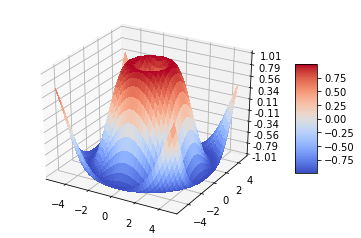

In [52]:

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [326]:
df.columns

Index([u'bank', u'pre_shock_equity', u'indirect_spillover', u'IV', u'time'], dtype='object')

In [13]:
d=pd.read_csv("./output/single_shock_" + str(environment.static_parameters['illiquidity'])  +"_"+ str(environment.num_agents) + "_" + str(environment.num_sweeps) + ".csv")


NameError: name 'environment' is not defined

In [22]:
p='/Users/admin/git_repos/BlackRhino/examples/firesale2020/experiments/single_shock'+'/output/'

In [23]:
import os

for files in os.walk(p):
    print(files)
    t=pd.read_csv(p+'single_shock_1e-13_10_9.csv')
    t['system_TAS'][2:].sum()

('/Users/admin/git_repos/BlackRhino/examples/firesale2020/experiments/single_shock/output/', [], ['.DS_Store', 'results_system_sweeps.csv', 'single_shock_1e-13_10_9.csv', 'single_shock_1e-13_10_8.csv'])


-556927358019.1349

In [29]:
t['system_TAS'][1] 

-834044238658.0405

In [45]:
temp=[]
helper={}
helper['asset class'] = str(sys.argv[2])
helper['shock'] =  str(sys.argv[1]) 
helper['time'] = '2015-12'
helper['valuation_losses']=t['system_TAS'][2:].sum()/t['system_assets'][0] *-1 *100
temp.append(pd.DataFrame(helper, index= ['2015-12']))
pd.DataFrame(helper, index= ['2015-12']).to_csv('t.csv')